<a href="https://colab.research.google.com/github/ArchisKulkarni002/RansomwareMLProject/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from collections import Counter

# Suppress all warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def train_test_split(df, test_size=0.2, random_state=None):

    # Randomly shuffle and sample the test set
    test_df = df.sample(frac=test_size, random_state=random_state)

    # Use the remaining data as the training set
    train_df = df.drop(test_df.index)

    return train_df, test_df

ransomware_df_path = '/content/drive/MyDrive/MLP/Random trees dataset/ransomware_top_features.csv'
ransomware_df = pd.read_csv(ransomware_df_path)
train_df, test_df = train_test_split(ransomware_df, test_size=0.2, random_state=42)
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)
print(train_df.shape)
print(test_df.shape)

train_x = train_df.drop(columns=['Label'])
train_y = train_df['Label']
label_mapping = {label: idx for idx, label in enumerate(train_y.unique())}
train_y = train_y.map(label_mapping)
test_x = test_df.drop(columns=['Label'])
test_y = test_df['Label'].map(label_mapping)


(313627, 21)
(78407, 21)


In [ ]:

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train_x.head())
print(train_y.head())
print(test_x.head())
print(test_y.head())

(313627, 20)
(313627,)
(78407, 20)
(78407,)
   Flow IAT Min  Flow IAT Max  Flow Duration  Flow Packets/s  Flow IAT Mean  Init_Win_bytes_forward  Bwd Packets/s  Fwd IAT Min  Fwd IAT Total  Fwd IAT Max  Fwd IAT Mean   Flow Bytes/s  Init_Win_bytes_backward  Flow IAT Std  Fwd IAT Std  Fwd Header Length  Packet Length Mean  Bwd Header Length  Packet Length Std  Packet Length Variance
0            24         49105         151054       92.682087    11619.53846                   65535      52.961193          111         101887        30425       20377.4   37410.462480                      353   14541.15588  12821.55074                200          376.733333                264         562.514948           316423.066700
1           349           349            349     5730.659026      349.00000                    1594       0.000000          349            349          349         349.0   65902.578800                       -1       0.00000      0.00000                 64           15.333333     

In [ ]:
def standardize_data(x_train, x_test):
  for col in x_train.columns:
    mean = x_train[col].mean()
    std = x_train[col].std()
    x_train[col] = (x_train[col] - mean) / std
    x_test[col] = (x_test[col] - mean) / std
  return x_train, x_test

train_x, test_x = standardize_data(train_x, test_x)
print(train_x.head())
print(test_x.head())


   Flow IAT Min  Flow IAT Max  Flow Duration  Flow Packets/s  Flow IAT Mean  Init_Win_bytes_forward  Bwd Packets/s  Fwd IAT Min  Fwd IAT Total  Fwd IAT Max  Fwd IAT Mean  Flow Bytes/s  Init_Win_bytes_backward  Flow IAT Std  Fwd IAT Std  Fwd Header Length  Packet Length Mean  Bwd Header Length  Packet Length Std  Packet Length Variance
0     -0.230758     -0.498926      -0.478775       -0.142845      -0.367803                1.375776      -0.105434    -0.223201      -0.392968    -0.422815     -0.348999     -0.067068                -0.192704     -0.406419    -0.336456           0.002635            1.295065           0.002968           1.705386                1.195715
1     -0.230707     -0.501654      -0.485631       -0.035511      -0.369409               -0.705066      -0.109591    -0.223166      -0.398388    -0.424967     -0.351611     -0.041573                -0.233596     -0.408854    -0.338610           0.002632           -0.535691           0.002962          -0.589970              

In [ ]:
class KNN :
  def __init__(self, k):
    self.k = k

  def fit(self, X, Y):
    self.X = X
    self.Y = Y

  def predict(self, test_x):
    predictions = []
    for i, x in enumerate(test_x):
      pred  = self._predict(x.reshape(-1,1))
      predictions.append(pred)
    return predictions

  def _predict(self, x):
    distances = self.X.T - x
    distances = distances.T
    distances = np.linalg.norm(distances, ord = 2,axis=1)
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.Y[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return  most_common[0][0]

In [ ]:

knn_model = KNN(k=9)
knn_model.fit(train_x.values, train_y.values)
predictions5, predictions7, predictions9  = knn_model.predict(test_x.to_numpy())

import json, csv


with open('/content/drive/MyDrive/MLP/KNN/predictions5.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(predictions5)

with open('/content/drive/MyDrive/MLP/KNN/predictions7.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(predictions7)

with open('/content/drive/MyDrive/MLP/KNN/predictions9.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(predictions9)



In [ ]:

inv_label_mapping = {v: k for k, v in label_mapping.items()}
true_y = np.vectorize(inv_label_mapping.get)(test_y.to_numpy())

pred_y5 = [inv_label_mapping[encoded_value] for encoded_value in predictions5]
pred_y7 = [inv_label_mapping[encoded_value] for encoded_value in predictions7]
pred_y9 = [inv_label_mapping[encoded_value] for encoded_value in predictions9]

Accuracy: 0.2860076268700499


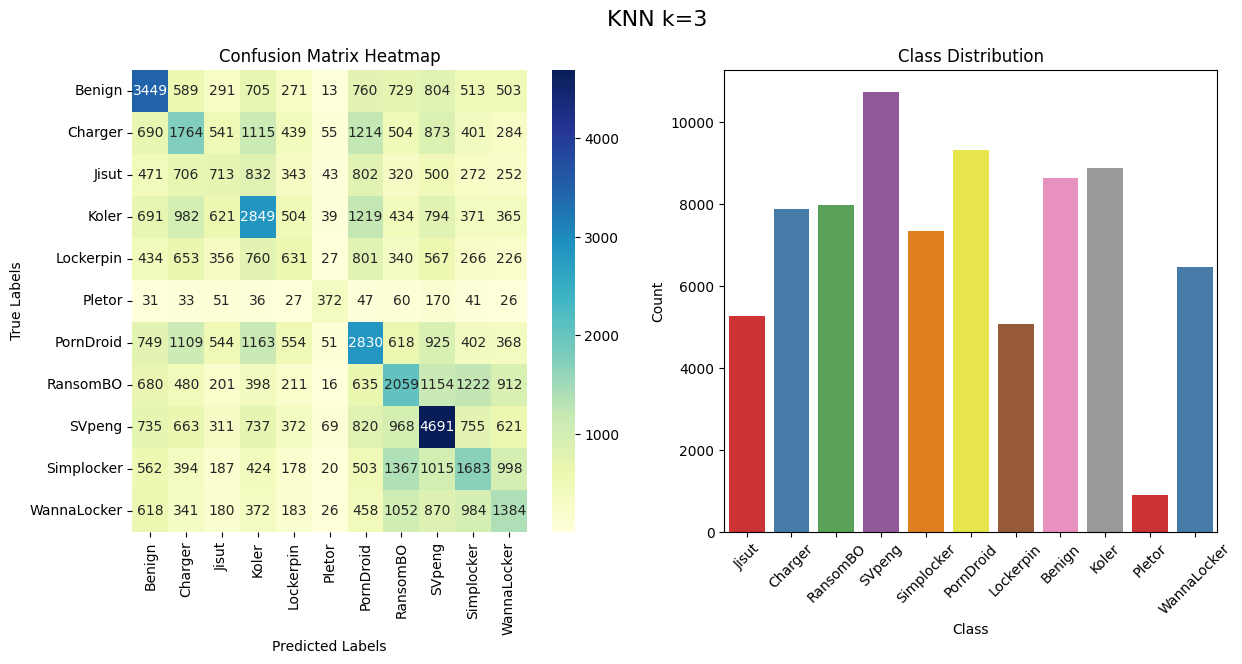

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



accuracy = accuracy_score(true_y, pred_y)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(true_y, pred_y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = np.unique(true_y)

sns.heatmap(conf_matrix, ax=axes[0], annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
sns.countplot(x=true_y, ax=axes[1], palette=sns.color_palette("Set1", n_colors=11))
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix Heatmap")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].set_title("Class Distribution")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.suptitle("KNN k=3", fontsize=16)

plt.show()
plt.show()

Accuracy5: 0.29181068016886247
Accuracy7: 0.2897828000051016
Accuracy9: 0.2860076268700499


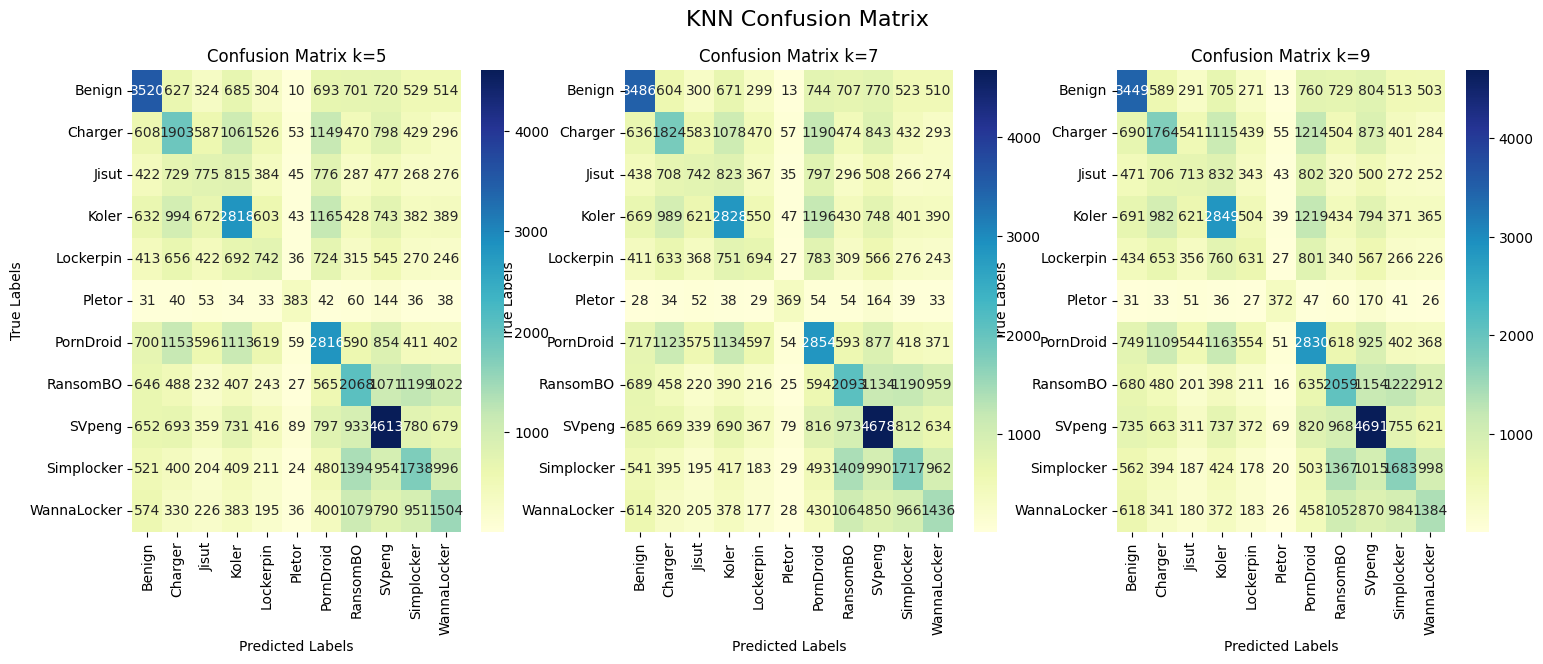

In [ ]:
accuracy5 = accuracy_score(true_y, pred_y5)
accuracy7 = accuracy_score(true_y, pred_y7)
accuracy9 = accuracy_score(true_y, pred_y9)
print("Accuracy5:", accuracy5)
print("Accuracy7:", accuracy7)
print("Accuracy9:", accuracy9)
conf_matrix5 = confusion_matrix(true_y, pred_y5)
conf_matrix7 = confusion_matrix(true_y, pred_y7)
conf_matrix9 = confusion_matrix(true_y, pred_y9)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
labels = np.unique(true_y)
# plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix5, ax=axes[0], annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
sns.heatmap(conf_matrix7, ax=axes[1], annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
sns.heatmap(conf_matrix9, ax=axes[2], annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix k=5")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix k=7")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")
axes[2].set_title("Confusion Matrix k=9")

plt.suptitle("KNN Confusion Matrix", fontsize=16)

plt.show()